<a href="https://colab.research.google.com/github/JNario31/KNN/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from re import X
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
print(iris.data)   # Raw Data
print(iris.target) # Target Labels (Different species, 0 - 2, each sample corresponds to a certain species)


# X contains the features sepal
# Y Contains the Target data
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target

# Splits data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k) #Build KNN
    knn.fit(X_train, y_train)                 #Train KNN
    y_pred = knn.predict(X_test)              #Predict on Test Set
    accuracy = accuracy_score(y_test, y_pred)*100
    print(f"Accuracy for k={k}: {accuracy:2f}%")

Accuracy for k=1: 65.789474%
Accuracy for k=2: 65.789474%
Accuracy for k=3: 60.526316%
Accuracy for k=4: 65.789474%
Accuracy for k=5: 71.052632%
Accuracy for k=6: 71.052632%
Accuracy for k=7: 68.421053%
Accuracy for k=8: 71.052632%
Accuracy for k=9: 81.578947%
Accuracy for k=10: 73.684211%
Accuracy for k=11: 81.578947%
Accuracy for k=12: 71.052632%
Accuracy for k=13: 84.210526%
Accuracy for k=14: 76.315789%
Accuracy for k=15: 78.947368%
Accuracy for k=16: 78.947368%
Accuracy for k=17: 78.947368%
Accuracy for k=18: 73.684211%
Accuracy for k=19: 78.947368%


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# pipeline with data normalization (Removes mean and scales to unit variance)
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

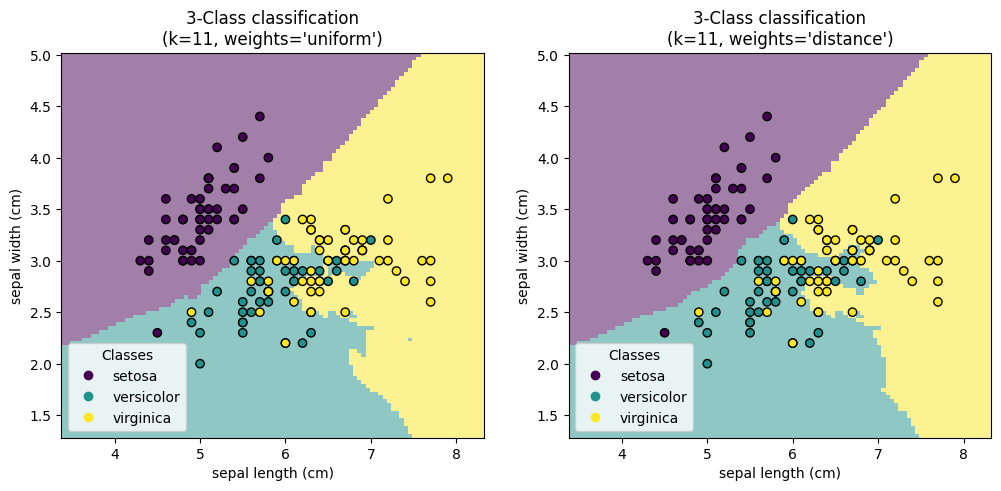

In [19]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()